In [2]:
from infrastructure.classes import Experiment, TrainParameters
from infrastructure.training import train
import torch

experiment = Experiment(
    tensor_parameters=dict(dtype=torch.float64, device=torch.device("cpu")),
    dataset_name="not_conditional_banana",
    dataset_number_of_points=10**5,
    dataloader_parameters=dict(batch_size=256, shuffle=True),
    pushforward_operator_name="denoising_diffusion",
    pushforward_operator_parameters=dict(
        feature_dimension=1,
        response_dimension=2,
        hidden_dimension=32,
        number_of_hidden_layers=1,
    ),
    train_parameters=TrainParameters(
        number_of_epochs_to_train=10,
        verbose=True,
        optimizer_parameters=dict(lr=0.001),
        scheduler_parameters=dict(eta_min=0)
    )
)

model = train(experiment)
_ = model.eval()

Epoch: 10, Objective: 0.2925: 100%|██████████| 10/10 [00:05<00:00,  1.67it/s]


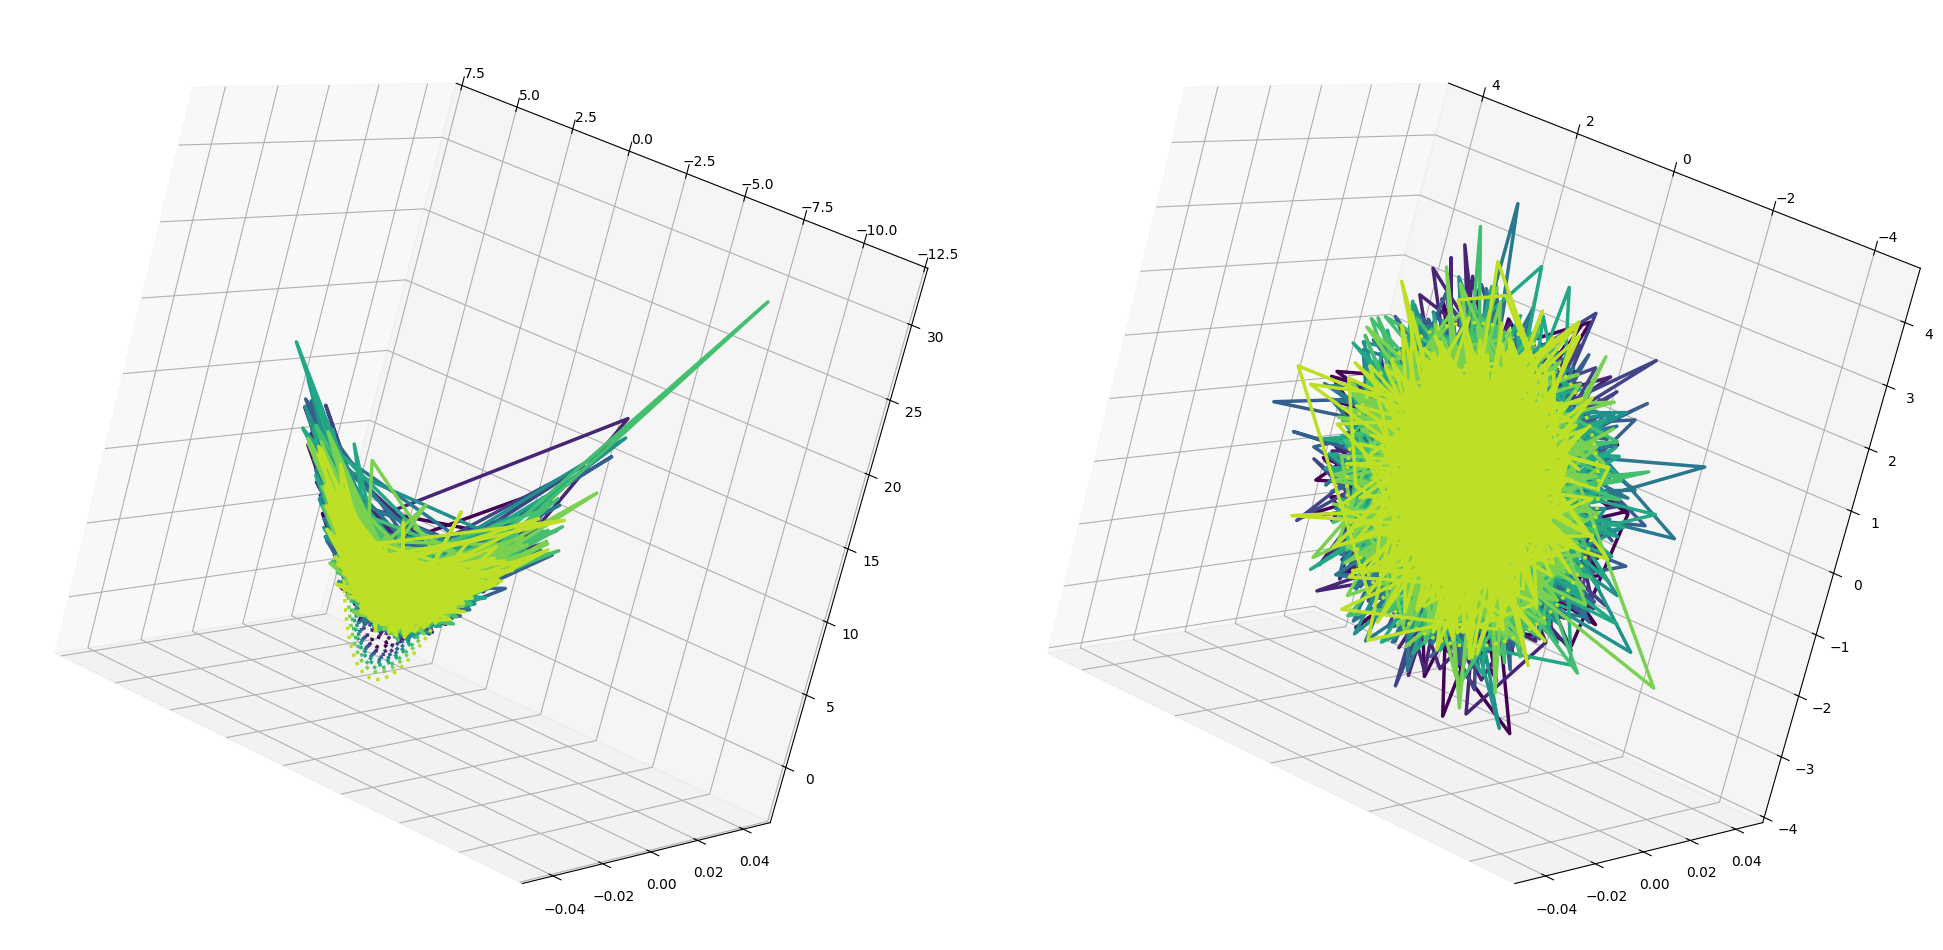

In [3]:
%matplotlib inline
from utils.plot import plot_quantile_levels_from_dataset
from datasets import NotConditionalBananaDataset
dataset = NotConditionalBananaDataset(tensor_parameters=experiment.tensor_parameters)

plot_quantile_levels_from_dataset(
    model=model,
    dataset=dataset,
    conditional_value=torch.tensor([[1.]]),
    number_of_quantile_levels=10,
    tensor_parameters=experiment.tensor_parameters
)